In [2]:
import math
import pickle
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec

from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, accuracy_score

In [7]:
# Read the file in which the values are saved
appa2 = pd.read_csv("../exports/appa2.csv")
appa2 = appa2.drop('Unnamed: 0', axis=1)

# Random Forest

In [8]:
# Select the features
cols = [
    'LaFeO3_1', 'LaFeO3_2', 
    'STN_1', 'STN_2', 
    'LaFeO3_1_heatR', 'LaFeO3_2_heatR',
    'STN_1_heatR', 'STN_2_heatR', 
    'LaFeO3_1_heatV', 'LaFeO3_2_heatV', 
    'STN_1_heatV', 'STN_2_heatV', 
    'Temperature', 'Relative_Humidity', 'Pressure', 'VOC', 
    'LaFeO3_1_Age', 'LaFeO3_2_Age',
    'STN_1_Age', 'STN_2_Age', 
    'sin_hour', 'cos_hour', 
    'sin_weekday', 'cos_weekday', 
    'sin_month', 'cos_month', 
    'sin_ordate', 'cos_ordate',
    'year', 
    'UV', 'Rain', 'Wind_Speed', 'sin_wind', 'cos_wind', 
]

# Select the target
outs = ['PM10', 'CO', 'NO2']

In [9]:
# Split the values in training and test
vsplit = round(len(appa2) * 0.2)

X_train = appa2.iloc[vsplit:][cols]
X_test = appa2.iloc[:vsplit][cols]

Y_train = appa2.iloc[vsplit:][outs]
Y_test = appa2.iloc[:vsplit][outs]

In [9]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start= 100, stop= 2000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5 ,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2 ,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [10]:
# Choose the type of model
model = RandomForestRegressor()

In [ ]:
# Perform the RandomForestRegression with a Random Search on hyperparameters
rf_random = RandomizedSearchCV(estimator=model, param_distributions=random_grid, n_iter=100, cv=3, verbose=2,
                               random_state=42, n_jobs=-1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=69, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=777; total time=  15.4s
[CV] END bootstrap=True, max_depth=69, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=777; total time=  15.8s
[CV] END bootstrap=True, max_depth=75, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=822; total time=  16.2s
[CV] END bootstrap=True, max_depth=66, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=822; total time=  16.3s
[CV] END bootstrap=True, max_depth=69, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=777; total time=  16.5s
[CV] END bootstrap=True, max_depth=66, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=822; total time=  16.7s
[CV] END bootstrap=True, max_depth=75, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, n_estimators=822; tota

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [65, 66, 67, 68, 69, 70,
                                                      71, 72, 73, 74, 75,
                                                      None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [2, 3],
                                        'min_samples_split': [9, 10, 11],
                                        'n_estimators': [600, 644, 688, 733,
                                                         777, 822, 866, 911,
                                                         955, 1000]},
                   random_state=42, verbose=2)

In [ ]:
# Create a Dataframe with the results of the model and then saving them into a .csv file
ris = pd.DataFrame(rf_random.cv_results_)
ris.to_csv('risultati_weather3.csv')

In [ ]:
# Save the model itself in a .sav file
pickle.dump(rf_random, open('random_forest_gridsearch_weather3.sav', 'wb'))

## Results

In [3]:
rf_random = pickle.load(open("random_forest2_gridsearch_weather.sav", "rb"))
rf_random

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [11]:
# A method to print the performance of the model

def evaluate(model, test_features, test_labels):
    test_labels = test_labels.to_numpy()
    pred = model.predict(test_features)
    error = mean_absolute_error(test_labels, pred)
    print('Model Performance')
    print(f'Average Degrees Error:\n{error}')
    return error

In [12]:
base_error = evaluate(rf_random, X_test, Y_test)

Model Performance
Average Degrees Error:
12.8958783899134


## Hyperparameters Plots

In [25]:
ris = pd.read_csv("risultati2_weather1.csv")
ris.columns

Index(['Unnamed: 0', 'mean_fit_time', 'std_fit_time', 'mean_score_time',
       'std_score_time', 'param_n_estimators', 'param_min_samples_split',
       'param_min_samples_leaf', 'param_max_features', 'param_max_depth',
       'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

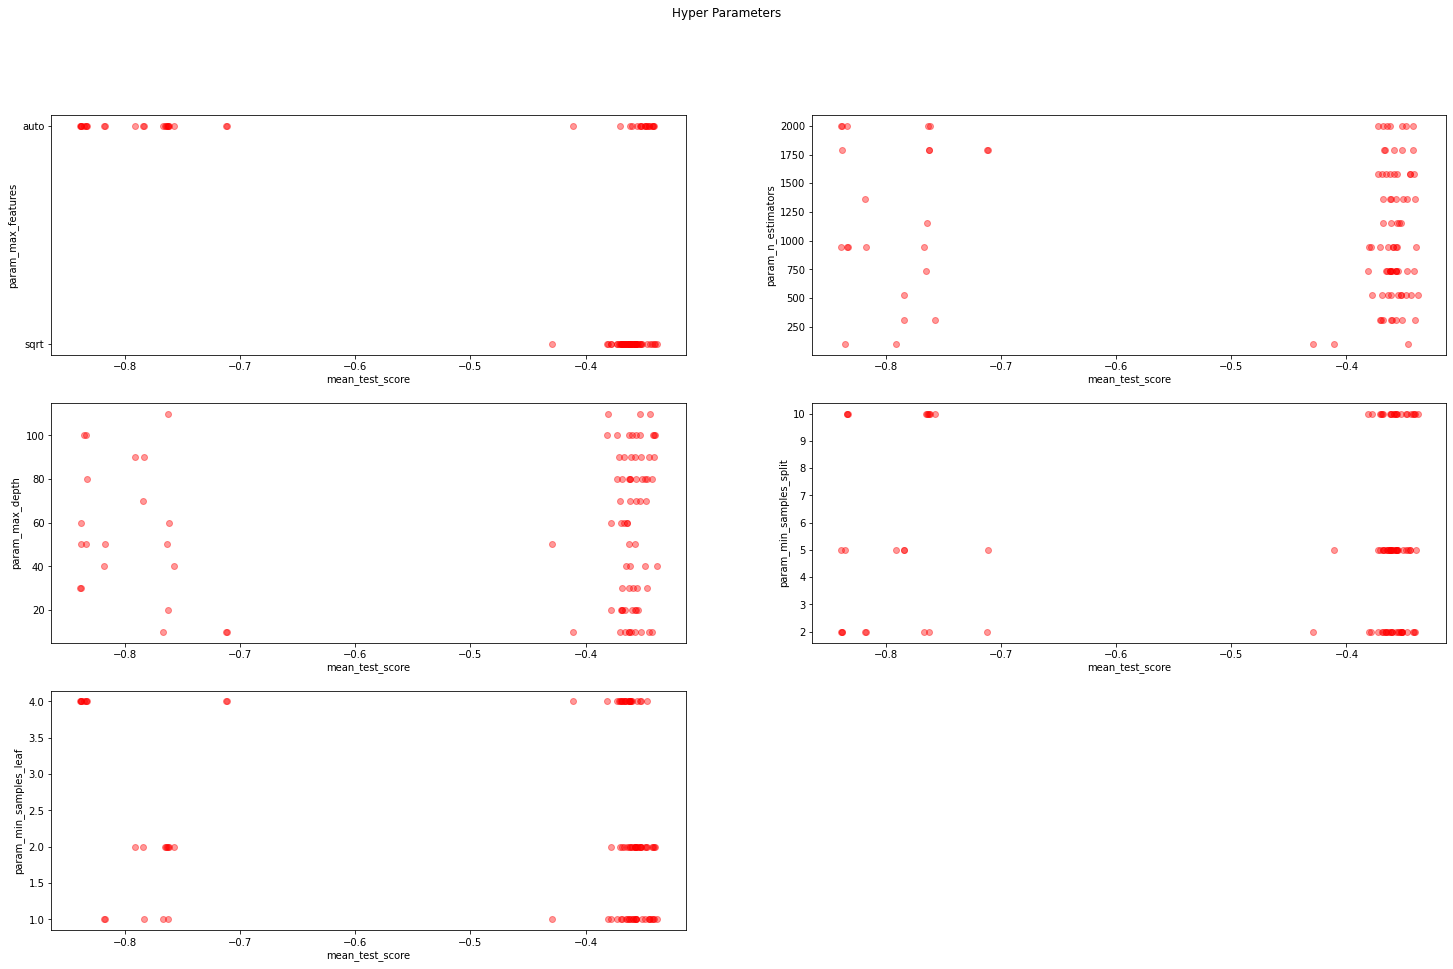

In [26]:
# Plot the hyper-parameters in relation of mean test score
# Values are plotted through dots. The brighter the dot, the more times that value has been chosen by the models.
# On the X axis, the closer the values are to 0 the better they are

h_params = ['param_max_features', 'param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', ]
fig = plt.figure(figsize=(25, 15))
fig.suptitle('Hyper Parameters')
outer = gridspec.GridSpec(3, 2, wspace=0.2, hspace=0.2)
for index, h_param in enumerate(h_params):
    ax = plt.Subplot(fig, outer[index])
    ax.scatter(ris['mean_test_score'], ris[h_param], color='red', alpha=0.4, )
    ax.set_ylabel(h_param)
    ax.set_xlabel('mean_test_score')
    fig.add_subplot(ax)
fig.show()

## Feature Importance

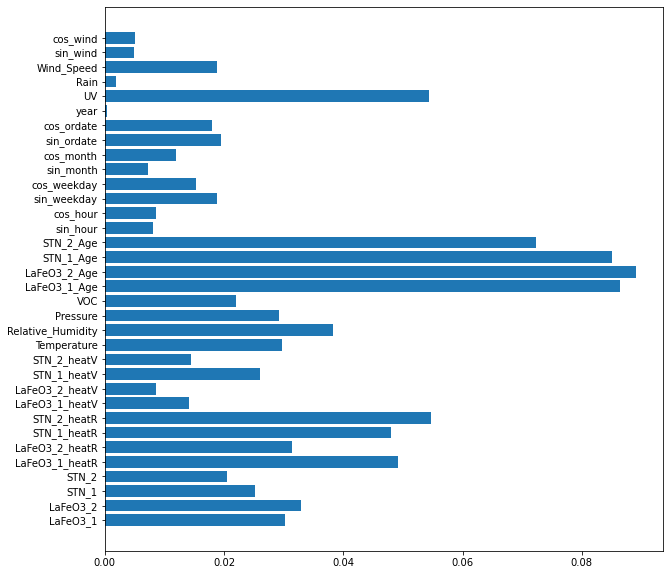

In [27]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()
ax.barh(X_test.columns, rf_random.best_estimator_.feature_importances_)
plt.show()